In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.load("tidal_clean_data.npz")
x_data = data["x_data"]
y_data = data["y_data"]

In [4]:
# same process as step 2
def oscillatory_model(x, A, omega, phi, C): # defining the tide model for data fitting
    return A * np.sin(omega * x + phi) + C

sigma = 0.25

p0 = [
    1.0,                    # 1 ft amplitude
    2 * np.pi/12.4,         # one cycle / 12.4 hours
    0.0,                    # phi is the phase shift and we're starting with zero phase
    np.mean(y_data)         # starting at the average tide height
]

popt, pcov = curve_fit(
    oscillatory_model,
    x_data,
    y_data,
    p0=p0,
    sigma=np.full_like(x_data, sigma),
    absolute_sigma=True
)

A_fit, omega_fit, phi_fit, C_fit = popt
print("Best Fit Parameters:", popt)

Best Fit Parameters: [3.25411372 0.31489963 5.60047671 2.57683605]


In [7]:
# this cell also computes the residuals like in step 3 but only to measure how unusual a 2 ft tsunami is
model_values = oscillatory_model(x_data, *popt)
residuals = y_data - model_values

res_std = np.std(residuals)
print("Residual Standard Deviation (ft):", res_std)

Residual Standard Deviation (ft): 0.7342740162403333


In [11]:
# this is how many sigma a 2 ft tsunami spike would be
tsunami_height = 2.0    # feet above normal high tide
z = tsunami_height / res_std

print(f"A 2 ft tsunami is about {z:.2f} standard deviations above what the model predicts")

A 2 ft tsunami is about 2.72 standard deviations above what the model predicts


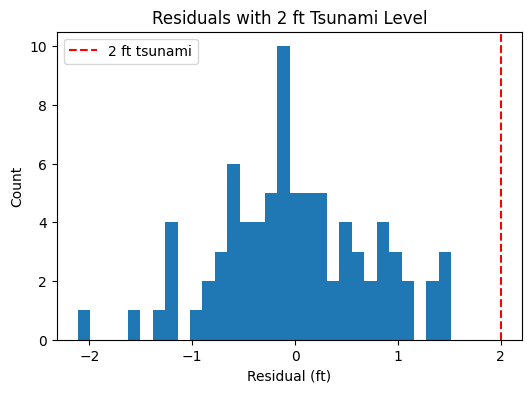

In [12]:
# this is the residual histogram showing where the 2 ft tsunami would be
plt.figure(figsize=(6, 4))

plt.hist(residuals, bins=30)
plt.axvline(2.0, color="red", linestyle="--", label="2 ft tsunami")

plt.xlabel("Residual (ft)")
plt.ylabel("Count")
plt.title("Residuals with 2 ft Tsunami Level")
plt.legend()

plt.savefig("residual_histogram_tsunami_included.pdf", dpi=300)
plt.show()